##  Chi-Squared analysis

In [4]:
import pandas as pd

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [5]:
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)

contingency_table

Lived_Died,died,lived,All
Gender,,,
Female,143,339,482
Male,709,161,870
All,852,500,1352


<Axes: xlabel='Gender'>

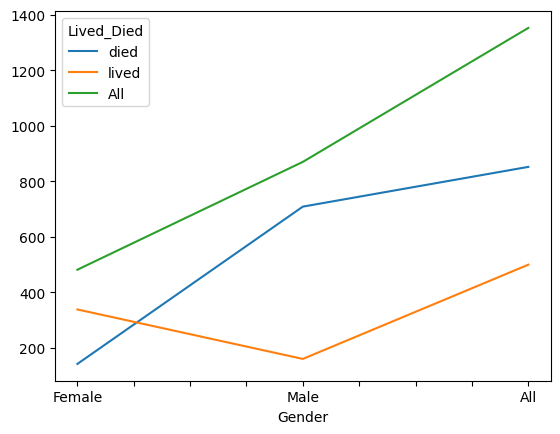

In [6]:
import matplotlib.pyplot as plt
contingency_table.plot()

Text(0, 0.5, 'Count')

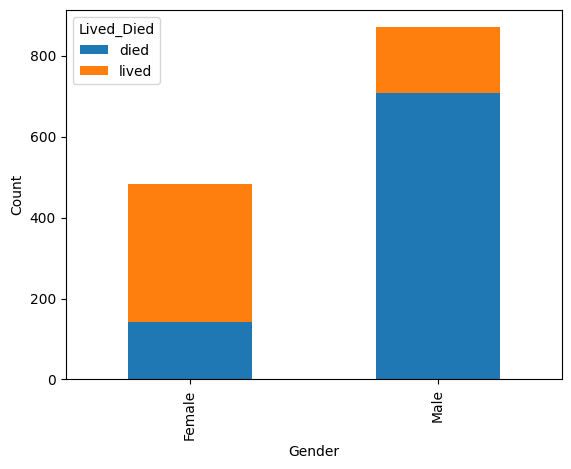

In [7]:
contingency_table.iloc[:-1,:-1].plot(kind='bar',stacked=True)
plt.ylabel('Count')

In [8]:
from scipy import stats 
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (np.float64(24.465546982751874), np.float64(0.0009433264132943263), 7)


C:\Users\marti\AppData\Local\Temp\ipykernel_35880\2007665128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)


Text(0.5, 1.0, 'Histogram of Age Ranges')

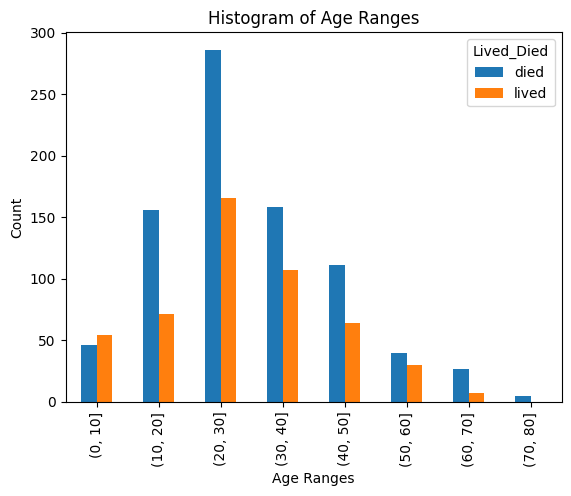

In [9]:
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')

In [11]:
pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import seaborn as sns
from sklearn import preprocessing

passenger_df.drop(['Name','Born','Died','Fare_decimal','Passenger_Class'], axis=1,inplace=True)
passenger_df.dropna(inplace=True)
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] =  le.fit_transform(passenger_df['Age'],bin=range(0,90,10))

pivot_table = pd.pivot_table(passenger_df,values='Lived_Died_int',index=['Gender'],columns=['Age_Groups'])
pivot_table.applymap(lambda:1-x)
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
sns.heatmap(pivot_table,annot=True,yticklabels=['Female','Male'],xticklabels=x_axis_labels,fmt='.2f',cmap='rocket')
plt.title('Heatmap Comparing')


TypeError: LabelEncoder.fit_transform() got an unexpected keyword argument 'bin'